In [20]:
from ipywidgets import widgets, interact, fixed
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import locale
import sys 
import os 
# Add the higher-level directory containing the module to the sys.path 
module_path = os.path.abspath(os.path.join('..', 'libs')) 
if module_path not in sys.path: 
    sys.path.append(module_path) # Import the class from the module from your_module import


from ReportData import *
from ReportGraphs import *

# Set locale to US English for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# setup reports class
ReportsClass = ReportData(copy_file=False,use_copied_file=False)

## FIRE Tracker

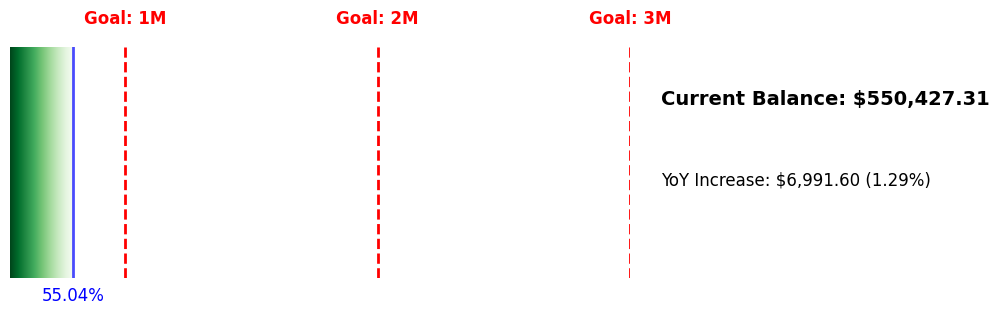

In [6]:
current_balance, previous_balance, goal_balances, goal_dates, goal_ages = ReportsClass.get_fire_balances()
fire_progress_bar(current_balance, previous_balance, goal_balances, goal_dates, goal_ages)

## Current Balance By Type

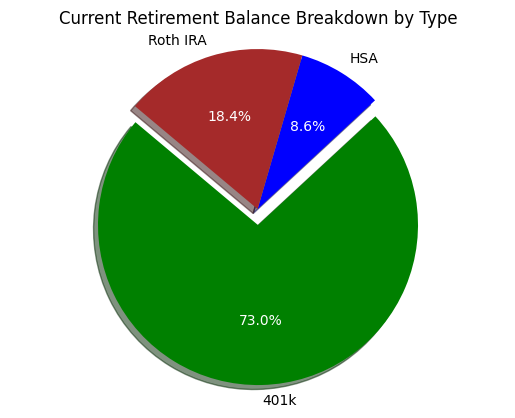

In [3]:
current_balance_df = ReportsClass.get_end_of_year_total_retirement_balance(year=2024)
df = current_balance_df.groupby(['Type']).agg(Balances=('Balance', 'sum')).reset_index()
pie_chart_balance_breakdown(df)

### Pre Tax Vrs Post Tax Money

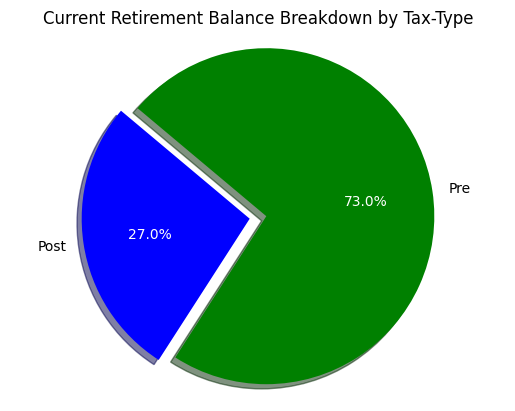

In [4]:
current_balance_df = current_balance_df.copy()  # Create a copy of the DataFrame
current_balance_df['Tax-Type'] = current_balance_df['Type'].apply(lambda x: 'Post' if 'Roth' in x or x == 'HSA' else 'Pre')
df = current_balance_df.groupby(['Tax-Type']).agg(Balances=('Balance', 'sum')).reset_index()
pie_chart_balance_breakdown(df, by_column='Tax-Type')

### Networth

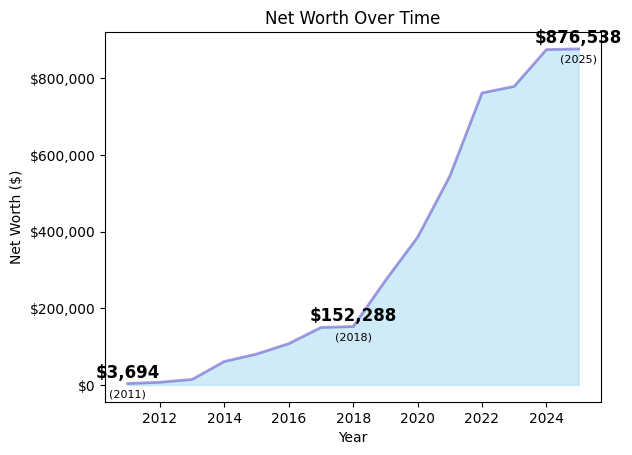

In [45]:
df = ReportsClass.balances_df
df = df[(df['End of Year Flag'] == True) & (df['Year']>=2011)]

networth_df = df.groupby(['Year']).agg(Balance=('Balance', 'sum')).reset_index()

years = networth_df['Year']
net_worth = networth_df['Balance']


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sample data (years and net worth

# Create the area chart
plt.fill_between(years, net_worth, color="skyblue", alpha=0.4)
plt.plot(years, net_worth, color="Slateblue", alpha=0.6, linewidth=2)

# Adding titles and labels
plt.title('Net Worth Over Time')
plt.xlabel('Year')
plt.ylabel('Net Worth ($)')

# Format y-axis as currency with commas
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Add data labels for the first entry, middle entry, and the latest year
label_indices = [0, len(net_worth) // 2, len(net_worth) - 1]
for i in label_indices:
    plt.text(years[i], net_worth[i] + 5000, f'${net_worth[i]:,.0f}', fontsize=12, fontweight='bold', ha='center', va='bottom')
    plt.text(years[i], net_worth[i] - 40000, f'({years[i]})', fontsize=8, ha='center', va='bottom', fontweight='regular')

# Show the plot
plt.show()
